# hash joins

- A hash table is built for the smallest row source
- Hash table is created by generating the hash values of ten key column
- The keys of second row source are hashed and checked against the hash table
- Full table scan is performed to the table that will be hashed
- Hash join is performed only when an equijoin is used
- user\_hash hint


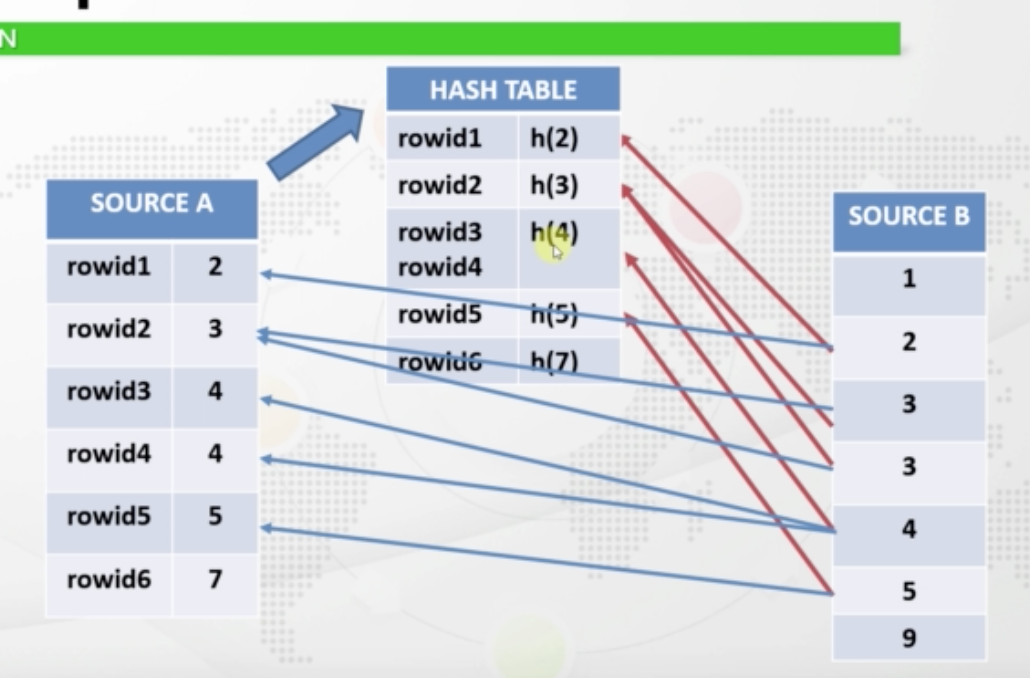

```sql
GRANT select_catalog_role TO hr;
GRANT SELECT ANY DICTIONARY TO hr;
 
SELECT * FROM employees e, departments d
WHERE d.department_id = e.department_id
AND d.manager_id = 110;
 
SELECT /*+ use_hash(d e) */ * FROM employees e, departments d
WHERE d.department_id = e.department_id
AND d.manager_id = 110;
``` 

# Cartesian Joins

- Joins all the rows of a table with all the rows of the other table
- It is not a realistic join for business
- It is mostly done by mistake by forgetting to write the join condition
- it results a very high cost

# Join Types Overview

# Equijoins & Nonequijoins

- If the join condition contains an equality operator, it is an quijoin
- Equijoins are the most commnly used join types
- To improve performance, you should use equijoins whenevery you can
- If you use another operator than the equality operator, it is nonequijoins
- Equijoins can use all join methods
- Nonequijoins cannot use the hash join method

```sql
/* Equijoin example */
select * from employees e, departments d
where e.department_id = d.department_id;
 
/* Nonequijoin example */
select * from employees e, jobs j
where e.salary between j.min_salary and j.max_salary;
``` 

# Outer Join

```sql
select * from employees e right outer join departments d
  using(department_id);
 
select * from departments d left outer join employees e
  using(department_id);
 
select * from employees e left outer join departments d
  using(department_id);
 
select * from departments d right outer join employees e
  using(department_id);
  
select /*+ USE_MERGE(e d) */* from employees e left outer join departments d
  using(department_id);
 
select /*+ USE_NL(e d) */* from employees e left outer join departments d
  using(department_id);
 
select /*+ USE_NL(d e) */* from employees e right outer join departments d
  using(department_id);
 
select * from employees e full outer join departments d
  using(department_id);
 
select * from employees e, departments d
  where e.department_id = d.department_id(+);
 
select * from employees e, departments d
  where e.department_id(+) = d.department_id(+);
 
select * from employees e left outer join departments d
  using(department_id)
  union
select * from employees e right outer join departments d
  using(department_id);
```

# Semi Joins

```sql
select * from departments d where exists
  (select 1 from employees e where d.department_id = e.department_id);
  
select * from departments d where department_id in
  (select department_id from employees e where d.department_id = e.department_id);
 
select * from employees e where exists
  (select 1 from departments d where d.department_id = e.department_id
``` 

# Antijoins

- Antijoins return the rows that do not match with the NOT in subquery

```sql
SELECT * FROM departments d WHERE department_id NOT IN
  (SELECT department_id FROM employees e WHERE d.department_id = e.department_id);
 
SELECT * FROM departments d WHERE NOT EXISTS
  (SELECT 1 FROM employees e WHERE d.department_id = e.department_id);
 
SELECT /*+ HASH_AJ */* FROM departments d WHERE NOT EXISTS
  (SELECT 1 FROM employees e WHERE d.department_id = e.department_id);
  
SELECT * FROM departments d WHERE NOT EXISTS
  (SELECT /*+ HASH_AJ */1 FROM employees e WHERE d.department_id = e.department_id);
 
SELECT * FROM employees e WHERE NOT EXISTS
  (SELECT 1 FROM departments d WHERE d.department_id = e.department_id);
``` 

# Result Cache Operator

- Result cache is a memory area is SGA to store the results of queries for some time to increase the performance
- 